In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import linregress
import matplotlib.pyplot as plt
#Loading set
df = pd.read_excel(r"C:\Users\Conrad Mogane\linear regression\Regression-\buyable2023.xlsx",
                   usecols = ['Year', 'Make', 'Car_Model', 'Price', 'Mileage', 'Year_Data_Collected'])
vivo = pd.read_excel(r"C:\Users\Conrad Mogane\Pictures\100CANON\VW_POLO_DATASET.xlsx", sheet_name=None)
fortuner = pd.read_excel(r"C:\Users\Conrad Mogane\Downloads\fortuner.xlsx")                 
#Feature engineering
#Age Normoilization
df['Age'] = df['Year_Data_Collected'] - df['Year']
# Data Preview
print('Size of data is ',len(df),'rows and ',len(df.columns), 'columns ')
print(df.info())
      

Size of data is  1821 rows and  7 columns 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Make                 1821 non-null   object
 1   Car_Model            1821 non-null   object
 2   Price                1821 non-null   int64 
 3   Mileage              1821 non-null   int64 
 4   Year                 1821 non-null   int64 
 5   Year_Data_Collected  1821 non-null   int64 
 6   Age                  1821 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 99.7+ KB
None


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


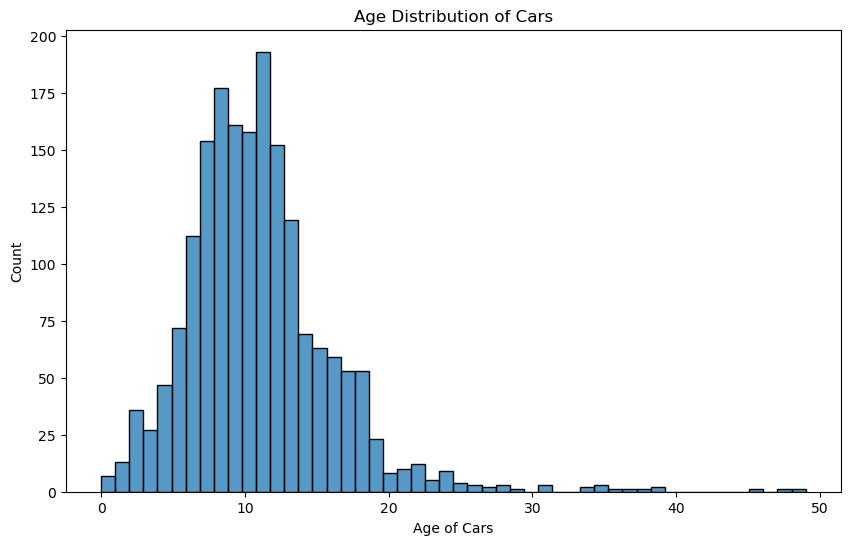

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(df,x='Age',)
plt.title('Age Distribution of Cars')
plt.xlabel('Age of Cars')   
plt.xscale('linear')

From the distribution, we can see that most cars are between 0 and 20 years old are worth analyzing due to sufficient data points.
The distribution is right-skewed, indicating that there are fewer older cars in the dataset.


In [6]:
cars = df[df['Age'] < 21]  # Filter for cars less than 20 years old


Text(0.5, 1.0, 'Boxplot of Price and Mileage')

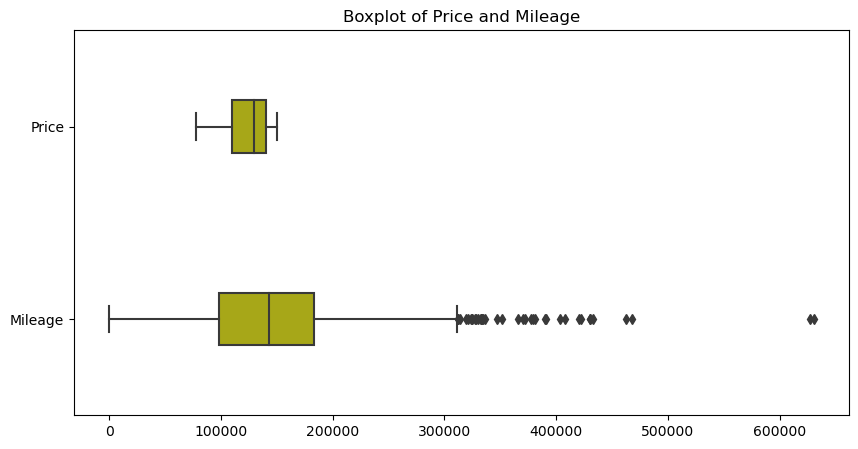

In [7]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Price', 'Mileage']], width=0.275, color= 'y', orient='h')
plt.title('Boxplot of Price and Mileage')

In [8]:
# Data Preview
print('Size of data is ',len(cars),'rows and ',len(cars.columns), 'columns ')

Size of data is  1756 rows and  7 columns 


Regression Analysis
1. Mileage v Age of Car
2. Price v Age of Car

In [9]:
cars

,Make,Car_Model,Price,Mileage,Year,Year_Data_Collected,Age
0,RENAULT,RENAULT CAPTUR 900T BLAZE 5DR (66KW),149950,96000,2017,2023,6
1,NISSAN,NISSAN MICRA 1.2 VISIA+ AUDIO 5DR (D86V),129950,22000,2017,2023,6
2,KIA,KIA PICANTO 1.2 LS,114999,70000,2017,2023,6
3,VOLKSWAGEN,VOLKSWAGEN POLO VIVO 1.4 5Dr,124995,166134,2014,2023,9
4,FORD,FORD FIGO 1.4 AMBIENTE,82995,162123,2013,2023,10
...,...,...,...,...,...,...,...
1816,HYUNDAI,HYUNDAI TUCSON 2.0 GLS,79990,250000,2008,2023,15
1817,SUZUKI,SUZUKI SX4 2.0,129990,119000,2011,2023,12
1818,GWM,GWM M4 1.5 CROSSOVER,119990,62000,2015,2023,8
1819,NISSAN,NISSAN MICRA 1.2 ACTIVE VISIA+,129990,35000,2018,2023,5


## **Mileage v.s Age of Car**

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


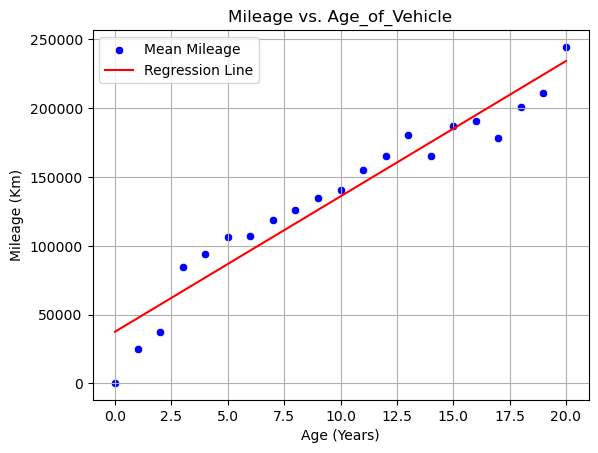

Mileage Regression equation: y = 9837.36x + 37597.93 

R² = 0.932 | P-value = 0.000 | Std Error = 609.291 | intercept = 37597.93 | Slope = 9837.36 

                            OLS Regression Results                            
Dep. Variable:           mean_mileage   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     260.7
Date:                Sun, 06 Jul 2025   Prob (F-statistic):           1.50e-12
Time:                        13:04:33   Log-Likelihood:                -233.19
No. Observations:                  21   AIC:                             470.4
Df Residuals:                      19   BIC:                             472.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [

In [10]:
cars_km = cars.groupby('Age')['Mileage'].aggregate(['mean', 'std', 'count']).round(2).reset_index()
cars_km.rename(columns={'mean': 'mean_mileage', 'std': 'std_mileage', 'count': 'count_km'}, inplace=True)
# Regression Analysis
##y = cars_km['mean']
# Add constant for intercept
#X = sm.add_constant(X)
x = sm.add_constant(cars_km['Age'])
model_km = sm.OLS(cars_km['mean_mileage'],x).fit()
# Compute regression variables
result_km = linregress(cars_km['Age'],cars_km['mean_mileage'])
slope_km = result_km.slope
intercept_km = result_km.intercept
r_value_km = result_km.rvalue
p_value_km = result_km.pvalue
std_err_km = result_km.stderr

# Plotting the regression line
sns.scatterplot(x=cars_km['Age'], y=cars_km['mean_mileage'], color='blue', label='Mean Mileage')
sns.lineplot(x=cars_km['Age'], y=slope_km * cars_km['Age'] + intercept_km, color='red', 
             label='Regression Line')
plt.xlabel("Age (Years)")
plt.ylabel("Mileage (Km)")
plt.title("Mileage vs. Age_of_Vehicle")
plt.legend()
plt.grid()
plt.show()


print(f"Mileage Regression equation: y = {slope_km:.2f}x + {intercept_km:.2f}",'\n')
print(f"R² = {r_value_km**2:.3f}",'|', f"P-value = {p_value_km:.3f}",'|', 
      f"Std Error = {std_err_km:.3f}",'|',f"intercept = {intercept_km:.2f}",'|',
      f"Slope = {slope_km:.2f}",'\n')
print('==============================================================================')
print(model_km.summary())

## **Price v.s Age of Car**

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


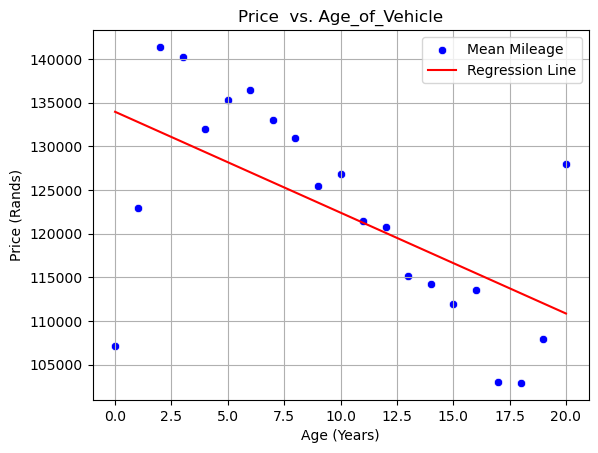

Price Regression equation: y = -1154.60x + 133940.93 

R² = 0.355 | P-value = 0.004 | Std Error = 356.745 | intercept = 133940.93 | Slope = -1154.60 

                            OLS Regression Results                            
Dep. Variable:             mean_price   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     10.47
Date:                Sun, 06 Jul 2025   Prob (F-statistic):            0.00434
Time:                        13:04:33   Log-Likelihood:                -221.95
No. Observations:                  21   AIC:                             447.9
Df Residuals:                      19   BIC:                             450.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|     

In [11]:
cars_price = cars.groupby('Age')['Price'].aggregate(['mean', 'std', 'count']).round(2).reset_index()
cars_price.rename(columns={'mean': 'mean_price', 'std': 'std_price', 'count': 'count_price'}, inplace=True)
# Regression Analysis
# Add constant for intercept for analysis
x1 = sm.add_constant(cars_price['Age'])
model_price = sm.OLS(cars_price['mean_price'], x1).fit()
# Compute regression variables
result_price = linregress(cars_price['Age'],cars_price['mean_price'])
slope_price = result_price.slope
intercept_price = result_price.intercept
r_value_price = result_price.rvalue
p_value_price = result_price.pvalue
std_err_price = result_price.stderr

# Plotting the regression line
sns.scatterplot(x=cars_price['Age'], y=cars_price['mean_price'], color='blue', label='Mean Mileage')
sns.lineplot(x=cars_price['Age'], y=slope_price * cars_price['Age'] + intercept_price, color='red', 
             label='Regression Line')
plt.xlabel("Age (Years)")
plt.ylabel("Price (Rands)")
plt.title("Price  vs. Age_of_Vehicle")
plt.legend()
plt.grid()
plt.show()


print(f"Price Regression equation: y = {slope_price:.2f}x + {intercept_price:.2f}",'\n')
print(f"R² = {r_value_price**2:.3f}",'|', f"P-value = {p_value_price:.3f}",'|', 
      f"Std Error = {std_err_price:.3f}",'|',f"intercept = {intercept_price:.2f}",'|',
      f"Slope = {slope_price:.2f}",'\n')
print(model_price.summary())

## **Summary of Key Points:**
Dataset Overview:



Dataset Size: 1821 rows and 7 columns. ​
Columns: Make, Car_Model, Price, Mileage, Year, Year_Data_Collected, Age.
Age Calculation: Age = Year_Data_Collected - Year. ​

Filtered Dataset:

Cars with Age &lt; 20 were filtered, resulting in 1748 rows. ​



Regression Analysis:


Mileage vs. Age of Car: ​

Regression Equation: y = 9675.62x + 38622.29. ​
R² (Coefficient of Determination): 0.921 (indicating a strong relationship). ​
P-value: 0.000 (statistically significant).
Std Error: 665.639.
Slope: 9675.62 (Mileage increases by ~9675.62 km per year of age). ​
Intercept: 38622.29.



Price vs. Age of Car: ​

Regression Equation: y = -1424.50x + 135650.29. ​
R²: 0.472 (moderate relationship). ​
P-value: 0.001 (statistically significant). ​
Std Error: 354.783.
Slope: -1424.50 (Price decreases by ~1424.50 Rands per year of age). ​
Intercept: 135650.29.



Observations:

Mileage: Strong positive correlation with car age. ​
Price: Moderate negative correlation with car age.

Statistical Model Details:

Mileage Regression: ​

Adjusted R²: 0.917. ​
F-statistic: 211.3 (high significance). ​
Durbin-Watson: 0.617 (indicating potential autocorrelation). ​


Price Regression: ​

Adjusted R²: 0.443. ​
F-statistic: 16.12. ​
Durbin-Watson: 0.643. ​



Visualizations:

Scatter plots and regression lines were plotted for both Mileage vs. Age and Price vs. Age. ​

This analysis highlights the trends in mileage and price as cars age, with mileage increasing and price decreasing over time.